In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, classification_report, 
                             confusion_matrix)


sns.set(style="whitegrid")

In [9]:
df = pd.read_csv("C:/Users/elbootic.com/Credit Scoring Model/archive/bank.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [28]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   default              4521 non-null   int64
 2   balance              4521 non-null   int64
 3   housing              4521 non-null   int64
 4   loan                 4521 non-null   int64
 5   day                  4521 non-null   int64
 6   duration             4521 non-null   int64
 7   campaign             4521 non-null   int64
 8   pdays                4521 non-null   int64
 9   previous             4521 non-null   int64
 10  y                    4521 non-null   int64
 11  job_blue-collar      4521 non-null   bool 
 12  job_entrepreneur     4521 non-null   bool 
 13  job_housemaid        4521 non-null   bool 
 14  job_management       4521 non-null   bool 
 15  job_retired          4521 non-null   bool 
 16  job_self-employed    452

age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0


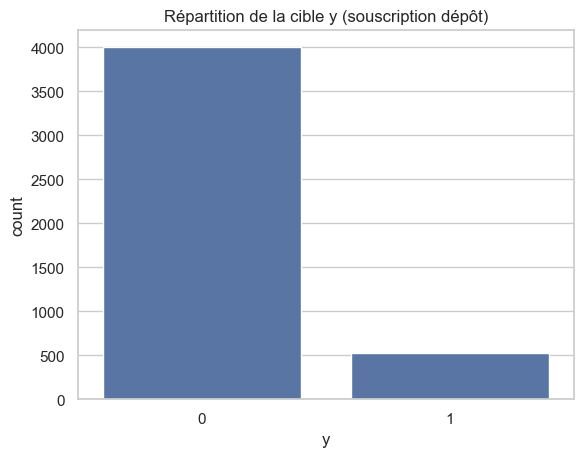

In [29]:
sns.countplot(x='y', data=df)
plt.title('Répartition de la cible y (souscription dépôt)')
plt.show()

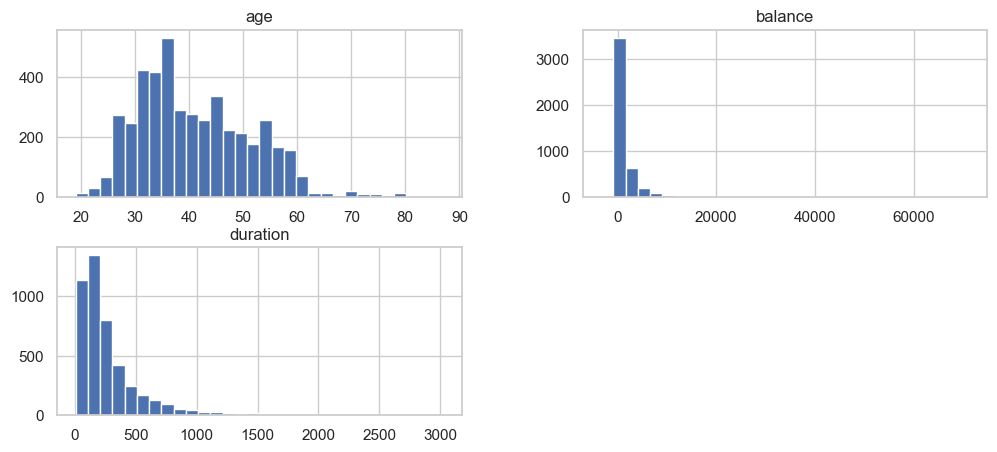

In [12]:
df[['age', 'balance', 'duration']].hist(bins=30, figsize=(12,5))
plt.show()


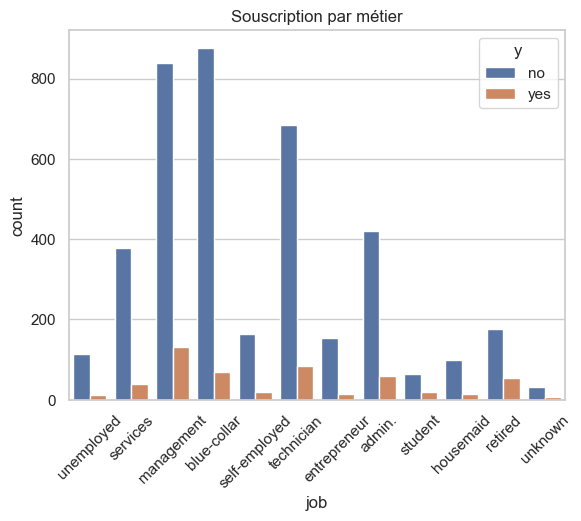

In [13]:
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.title('Souscription par métier')
plt.show()


In [15]:
# Colonnes binaires yes/no à encoder simplement
binary_cols = ['default', 'housing', 'loan', 'y']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Colonnes catégorielles à one-hot encoder
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,False,False,False,False,False,True,False,False,False,True
1,33,0,4789,1,1,11,220,1,339,4,...,False,False,False,True,False,False,False,False,False,False
2,35,0,1350,1,0,16,185,1,330,1,...,False,False,False,False,False,False,False,False,False,False
3,30,0,1476,1,1,3,199,4,-1,0,...,False,True,False,False,False,False,False,False,False,True
4,59,0,0,1,0,5,226,1,-1,0,...,False,False,False,True,False,False,False,False,False,True


In [31]:
print("Final form of the dataset :", df.shape)
print("List of columns :", df.columns)

Final form of the dataset : (4521, 43)
List of columns : Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')


In [17]:
X = df.drop('y', axis=1)
y = df['y']


In [46]:
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# Pipeline for Logistic Regression with Normalization
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=2000))
])

# Other models
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()


In [39]:
# Logistic Regression
logistic_pipeline.fit(X_train, y_train)
y_pred_lr = logistic_pipeline.predict(X_test)

# Decision Tree
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Random Forest
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)


In [40]:
print("🔹 Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lr))

print("\n🔹 Decision Tree")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_pred_dt))

print("\n🔹 Random Forest")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))


🔹 Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.60      0.28      0.38        98

    accuracy                           0.90       905
   macro avg       0.76      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905

[[789  18]
 [ 71  27]]
ROC AUC: 0.6266026856839391

🔹 Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       807
           1       0.45      0.49      0.47        98

    accuracy                           0.88       905
   macro avg       0.70      0.71      0.70       905
weighted avg       0.88      0.88      0.88       905

[[749  58]
 [ 50  48]]
ROC AUC: 0.7089623953670688

🔹 Random Forest
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.56      0.22      0.32        98

    accuracy            

In [48]:
results = []

results.append({
    "Modèle": "Logistic Regression",
    "Accuracy": round(accuracy_score(y_test, y_pred_lr), 3),
    "Precision": round(precision_score(y_test, y_pred_lr), 3),
    "Recall": round(recall_score(y_test, y_pred_lr), 3),
    "F1-Score": round(f1_score(y_test, y_pred_lr), 3),
    "ROC-AUC": round(roc_auc_score(y_test, y_pred_lr), 3)
})

results.append({
    "Modèle": "Decision Tree",
    "Accuracy": round(accuracy_score(y_test, y_pred_dt), 3),
    "Precision": round(precision_score(y_test, y_pred_dt), 3),
    "Recall": round(recall_score(y_test, y_pred_dt), 3),
    "F1-Score": round(f1_score(y_test, y_pred_dt), 3),
    "ROC-AUC": round(roc_auc_score(y_test, y_pred_dt), 3)
})

results.append({
    "Modèle": "Random Forest",
    "Accuracy": round(accuracy_score(y_test, y_pred_rf), 3),
    "Precision": round(precision_score(y_test, y_pred_rf), 3),
    "Recall": round(recall_score(y_test, y_pred_rf), 3),
    "F1-Score": round(f1_score(y_test, y_pred_rf), 3),
    "ROC-AUC": round(roc_auc_score(y_test, y_pred_rf), 3)
})

results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)

print("📊Comparative summary of models:")
print(results_df)


📊Comparative summary of models:
                Modèle  Accuracy  Precision  Recall  F1-Score  ROC-AUC
1        Decision Tree     0.881      0.453   0.490     0.471    0.709
0  Logistic Regression     0.902      0.600   0.276     0.378    0.627
2        Random Forest     0.897      0.564   0.224     0.321    0.602


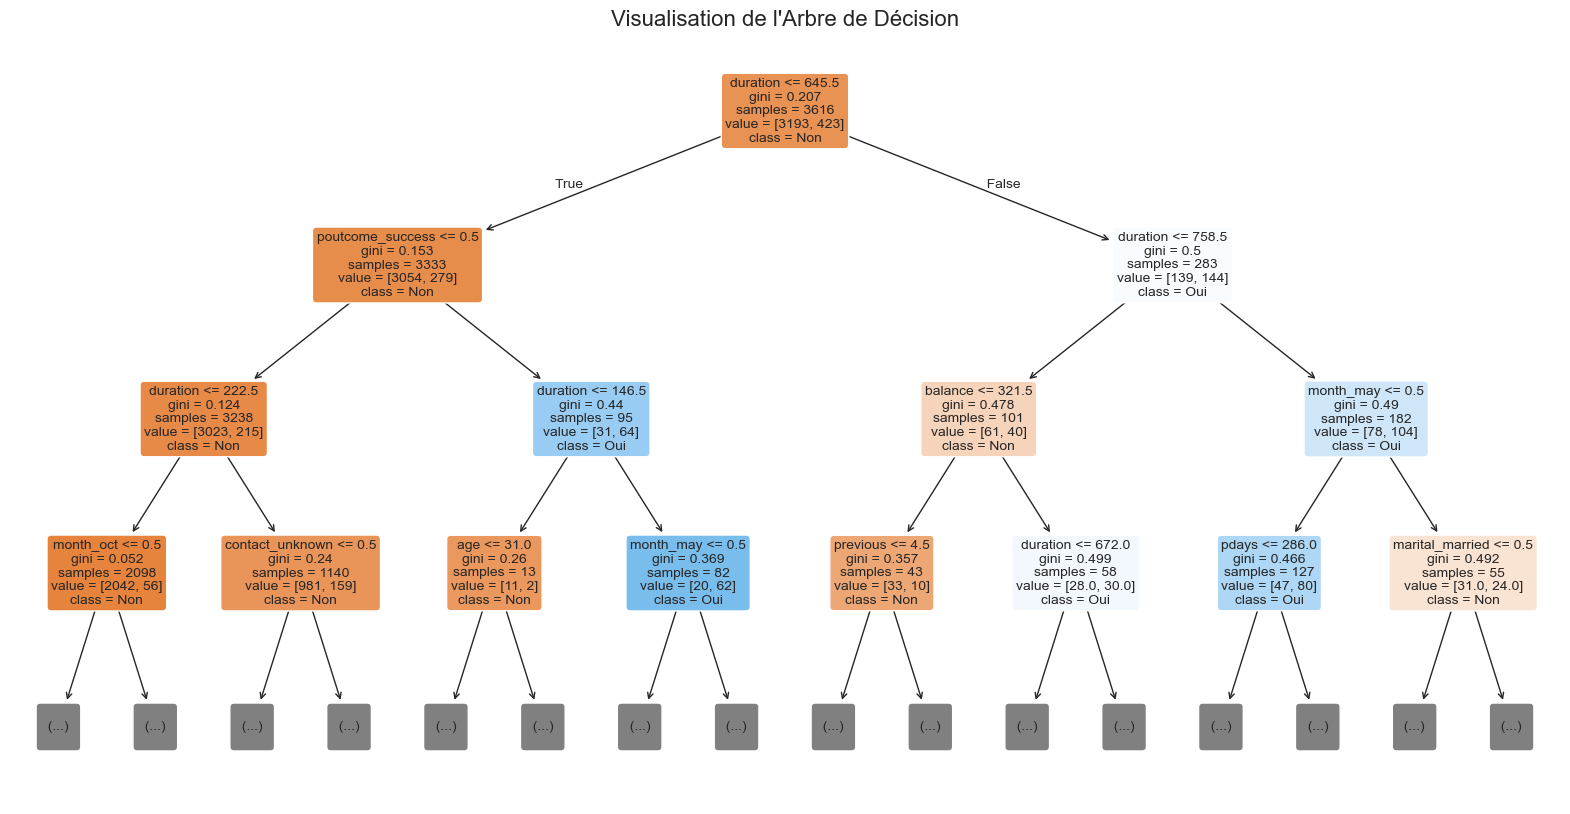

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))  # Taille de l'image (ajuste selon ton écran)
plot_tree(decision_tree, 
          feature_names=X.columns,   # noms des colonnes du dataset
          class_names=["Non", "Oui"],  # classes de sortie (selon ton jeu de données)
          max_depth=3,
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Visualisation de l'Arbre de Décision", fontsize=16)
plt.show()


In [45]:
Conclusion

The objective of the project was to predict a bank customer's creditworthiness based on their personal and financial data.

Three models were trained and compared:
- **Logistic Regression**
- **Decision Tree**
- **Random Forest**

 Main results:
- The **Decision Tree** achieved the best **F1-Score (0.471)** and the best **Recall (0.490)**, making it the most reliable model for **detecting risky customers**.
- Despite lower accuracy, its **ability to identify defaulters** is essential for credit scoring.
- Logistic Regression and Random Forest exhibit higher precision, but very low recall.

 Learning:
This project allowed me to:
- Understand the importance of metrics beyond accuracy (such as recall or ROC-AUC).
- Manipulate real data and apply machine learning techniques for decision-making.
- Choose a model adapted to the **business context** (credit risk prevention).

-> The final model chosen is the **decision tree**, for its balanced performance and interpretability.

SyntaxError: unterminated string literal (detected at line 3) (1675857204.py, line 3)